<img align="center" src=download.jpeg>                         
<h1 align="center"> COMPLEX NETWORK</h1>
<h4 align="center">ASSIGNMENT</h4>
<h3 align="center">Saliou FALL</h3>

---------------------------------------------------------------------------------------------

<h3 align="center"> Computer security / AIMS-SENEGAL</h3>
<h4 align="center">Email   : saliou.fall@aims-senegal.org</h4>

------------------

## I- Use networkx to answer the question of the quizz.
## II-Use networkx Compute the clusteting ,global clustering,degres distrubution,evarage paths lenght .
## III-Interpretayion of each computed quantity.
---------------------------------------------------------------------------------------------



<h1 align="center"> UNDIRECTED GRAPH</h1> 
<h4 > I-distance, eccentricity, radius, centre, Weiner index </h4> 

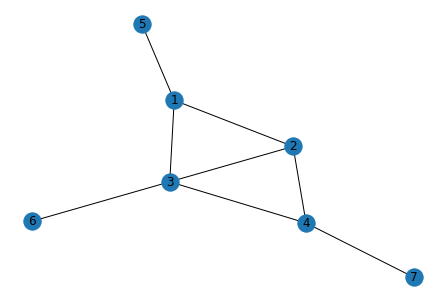

In [132]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(25)
G = nx.Graph()
G.add_edges_from([(1, 2), (1, 3),(1, 5),(2,3),(2,4),(3,6),(4,3),(4,7)])
nx.draw_kamada_kawai(G,with_labels=True,)
plt.show()

In [133]:
print(f"Distance f the graph \n {pd.DataFrame(dict(nx.all_pairs_shortest_path_length(G)))}")
print(f"eccentricity of the graph \n {nx.eccentricity(G)}\n" )
print(f"Radius of the graph \n {nx.radius(G)}\n")
print(f"Wiener index of the graph\n { nx.wiener_index(G)}")
print(f"Center  of the graph { nx.center(G)}")
#print(nx.shortest_path(G))


Distance f the graph 
    1  2  3  5  4  6  7
1  0  1  1  1  2  2  3
2  1  0  1  2  1  2  2
3  1  1  0  2  1  1  2
5  1  2  2  0  3  3  4
4  2  1  1  3  0  2  1
6  2  2  1  3  2  0  3
7  3  2  2  4  1  3  0
eccentricity of the graph 
 {1: 3, 2: 2, 3: 2, 5: 4, 4: 3, 6: 3, 7: 4}

Radius of the graph 
 2

Wiener index of the graph
 40.0
Center  of the graph [2, 3]


<h4 >II- Clusteting ,global clustering,degres distrubution,evarage paths lenght </h4> 

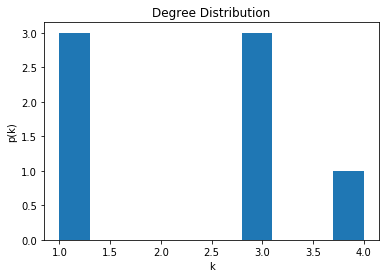

In [135]:
degrees = [G.degree(n) for n in G.nodes()]
plt.xlabel('k')
plt.ylabel('p(k)')
plt.title('Degree Distribution')
plt.hist(degrees)
plt.show()

In [138]:
print(f" Clustering coefficient for nodes \n { nx.clustering(G)}\n")
print(f"  The average clustering coefficient for the graph G : { nx.average_clustering(G)}\n")
print(f"  Global clustering coefficient for the graph G : { nx.transitivity(G)}\n")
print(f"  The average shortest path length : { nx.average_shortest_path_length(G)}")


 Clustering coefficient for nodes 
 {1: 0.3333333333333333, 2: 0.6666666666666666, 3: 0.3333333333333333, 5: 0, 4: 0.3333333333333333, 6: 0, 7: 0}

  The average clustering coefficient for the graph G : 0.23809523809523808

  Global clustering coefficient for the graph G : 0.4

  The average shortest path length : 1.9047619047619047


<h1 align="center"> DIRECTED GRAPH</h1> 
<h4 > I-Distance, eccentricity, radius, centre, Weiner index </h4> 

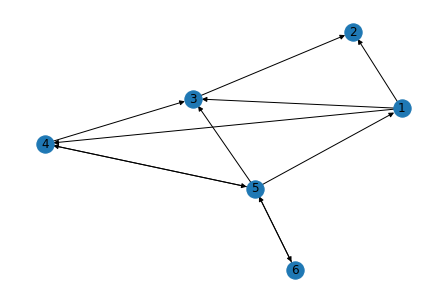

In [139]:
G = nx.DiGraph()
G.add_edges_from([(1, 2),(1, 3),(1,4),(3, 2),(4,3),(4,5),(5,1),(5,3),(5,4),(5,6),(6,5)])
nx.draw_kamada_kawai(G,with_labels=True,)
plt.show()

#### Distance matrix

In [140]:
data=pd.DataFrame(dict(nx.all_pairs_shortest_path_length(G))).fillna('inf').T
data

,1,2,3,4,5,6
1,0,1,1,1,2,3
2,inf,0,inf,inf,inf,inf
3,inf,1,0,inf,inf,inf
4,2,2,1,0,1,2
5,1,2,1,1,0,1
6,2,3,2,2,1,0


#### Diameter

In [141]:
def Diameter_inf(G):
    data=np.array(pd.DataFrame(dict(nx.all_pairs_shortest_path_length(G))).fillna('infi').T)
    for i in data:
        for j in i :
            if j == 'infi':
                return True
            
def Di_Diameter(G):
    if Diameter_inf(G)==True:
        return "inf"
    else:
        data=pd.DataFrame(dict(nx.all_pairs_shortest_path_length(G))).fillna('infi')
        return max(data.max())
Di_Diameter(G)

'inf'

In [142]:
def Test_inf(raw):
    for i in raw:
        if i == 'infi':
            return True
        
def D_eccentricity(G):
    data=np.array(pd.DataFrame(dict(nx.all_pairs_shortest_path_length(G))).fillna('infi')).T
    k=1
    for i in data:
        if Test_inf(i)== True:
            print(f"Ec({k}): inf")
        else:
            print(f"Ec({k}):{max(i)}")
        k+=1

In [143]:
D_eccentricity(G)

Ec(1):3
Ec(2): inf
Ec(3): inf
Ec(4):2
Ec(5):2
Ec(6):3


In [144]:
def Di_radius (G):
        data=pd.DataFrame(dict(nx.all_pairs_shortest_path_length(G))).T
        return min(data.min())
Di_radius (G)

0.0

<h4 >II- Clusteting ,global clustering,degres distrubution,evarage paths lenght </h4> 

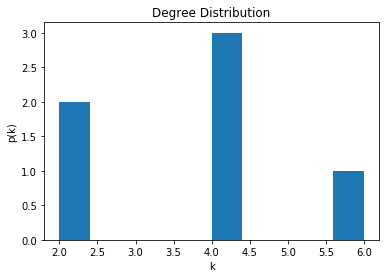

In [145]:
degrees = [G.degree(n) for n in G.nodes()]
plt.xlabel('k')
plt.ylabel('p(k)')
plt.title('Degree Distribution')
plt.hist(degrees)
plt.show()

In [146]:
print(f" Clustering coefficient for nodes \n { nx.clustering(G)}\n")
print(f" The average clustering coefficient for the graph G : { nx.average_clustering(G)}\n")
print(f" Global clustering coefficient for the graph G : { nx.transitivity(G)}\n")
print(f" The average shortest path length : { nx.average_shortest_path_length(G)}")

 Clustering coefficient for nodes 
 {1: 0.4166666666666667, 2: 0.5, 3: 0.4166666666666667, 4: 0.5, 5: 0.19230769230769232, 6: 0}

 The average clustering coefficient for the graph G : 0.3376068376068377

 Global clustering coefficient for the graph G : 0.3

 The average shortest path length : 1.1
